In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "../Data/Online Retail.xlsx"
df = pd.read_excel(file_path)

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# Remove cancelled invoices
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Remove missing Customer IDs
df = df.dropna(subset=['CustomerID'])

# Remove invalid quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Convert date column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
product_revenue = (
    df.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

product_revenue


Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142592.95
WHITE HANGING HEART T-LIGHT HOLDER    100448.15
JUMBO BAG RED RETROSPOT                85220.78
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68844.33
ASSORTED COLOUR BIRD ORNAMENT          56580.34
Manual                                 53779.93
RABBIT NIGHT LIGHT                     51346.20
Name: Revenue, dtype: float64

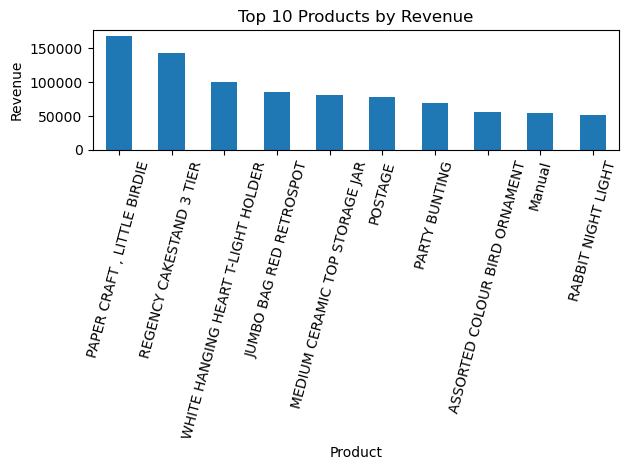

In [6]:
product_revenue.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()


In [7]:
country_revenue = (
    df.groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
)

country_revenue.head(10)


Country
United Kingdom    7308391.554
Netherlands        285446.340
EIRE               265545.900
Germany            228867.140
France             209024.050
Australia          138521.310
Spain               61577.110
Switzerland         56443.950
Belgium             41196.340
Sweden              38378.330
Name: Revenue, dtype: float64

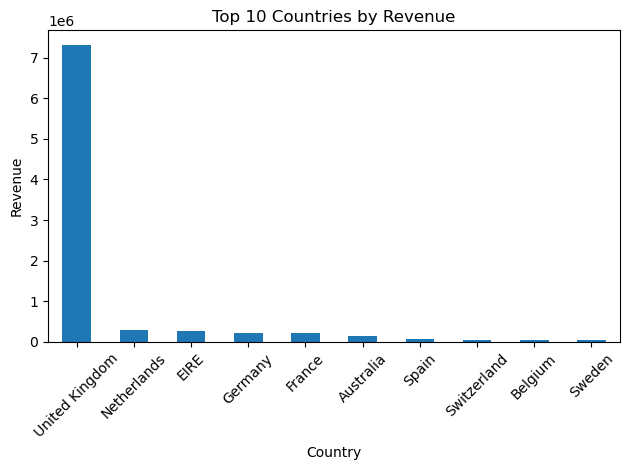

In [8]:
country_revenue.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('YearMonth')['Revenue'].sum()

monthly_revenue.head()


YearMonth
2010-12    572713.890
2011-01    569445.040
2011-02    447137.350
2011-03    595500.760
2011-04    469200.361
Freq: M, Name: Revenue, dtype: float64

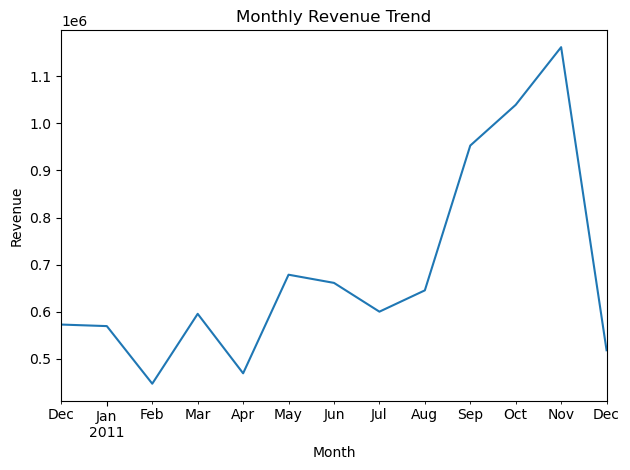

In [10]:
monthly_revenue.plot()
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


In [11]:
customer_revenue = (
    df.groupby('CustomerID')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

customer_revenue


CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Revenue, dtype: float64

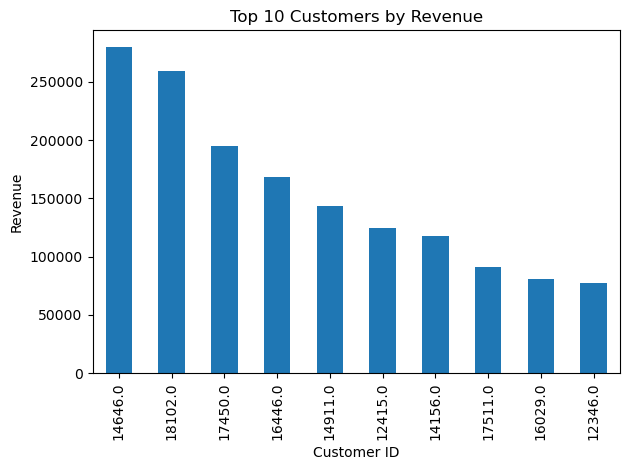

In [12]:
customer_revenue.plot(kind='bar')
plt.title('Top 10 Customers by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Customer ID')
plt.tight_layout()
plt.show()


In [13]:
# Export cleaned dataset for Tableau
df.to_csv("../Tableau/cleaned_retail_data.csv", index=False)
